In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt


df = pd.read_csv('assets/def_clean_output.csv')

C:\Users\bklim\AppData\Local\Temp\ipykernel_66396\2688286560.py:6: DtypeWarning: Columns (38,47,50,53,56,59,77,86,89,92,104,107,116,125,128,146,149,161,173,176,179,188,194,203,212) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('assets/def_clean_output.csv')


In [2]:
actions = [action for action in df.columns if '_act' in action]

In [3]:
cols = ['gameId','playId'] + actions

In [4]:
df = df[cols]

In [5]:
melt_df = df.melt(['gameId','playId']).dropna()

In [6]:
melt_df = melt_df.groupby(['gameId','playId','value']).count()

In [7]:
melt_df = melt_df.reset_index().pivot(index=['gameId','playId'],columns='value',values='variable').fillna(0)

In [8]:
melt_df

value                B    M    Z
gameId     playId               
2018090600 75      0.0  7.0  0.0
           146     0.0  5.0  2.0
           168     0.0  6.0  1.0
           190     1.0  3.0  3.0
           256     0.0  4.0  1.0
...                ...  ...  ...
2018121000 3747    0.0  5.0  1.0
           3786    0.0  2.0  4.0
           3817    0.0  5.0  2.0
           3839    0.0  6.0  1.0
           3864    1.0  3.0  3.0

[13964 rows x 3 columns]

In [9]:
melt_df['TOT'] = melt_df['B'] + melt_df['M'] + melt_df['Z']

In [10]:
melt_df['%B'] = melt_df['B'] / melt_df['TOT']

In [11]:
melt_df['%M'] = melt_df['M'] / melt_df['TOT']

In [12]:
X = melt_df[['%B','%M']].fillna(0)

In [13]:
melt_df.sort_values(by='%M')

,value,B,M,Z,TOT,%B,%M
gameId,playId,,,,,,
2018091613,3200,0.0,0.0,7.0,7.0,0.000000,0.0
2018120905,2002,2.0,0.0,6.0,8.0,0.250000,0.0
2018091001,524,0.0,0.0,7.0,7.0,0.000000,0.0
2018111109,899,1.0,0.0,6.0,7.0,0.142857,0.0
2018091613,3533,0.0,0.0,6.0,6.0,0.000000,0.0
...,...,...,...,...,...,...,...
2018092303,3476,0.0,8.0,0.0,8.0,0.000000,1.0
2018090906,3967,0.0,7.0,0.0,7.0,0.000000,1.0
2018100710,3388,0.0,7.0,0.0,7.0,0.000000,1.0


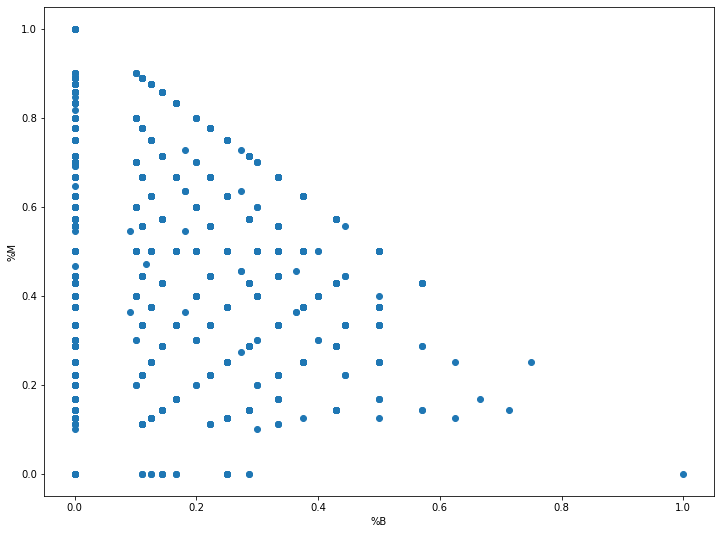

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,9))

plt.scatter(X['%B'],X['%M'])

plt.xlabel('%B')
plt.ylabel('%M')
plt.show()

In [15]:
wcss = []

from sklearn.cluster import KMeans

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


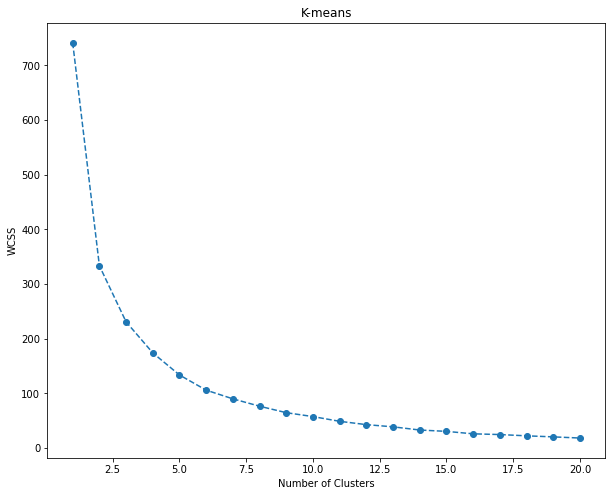

In [16]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means')
plt.show()

In [17]:


kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [18]:
melt_df['Cluster'] = kmeans.labels_

C:\Users\bklim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


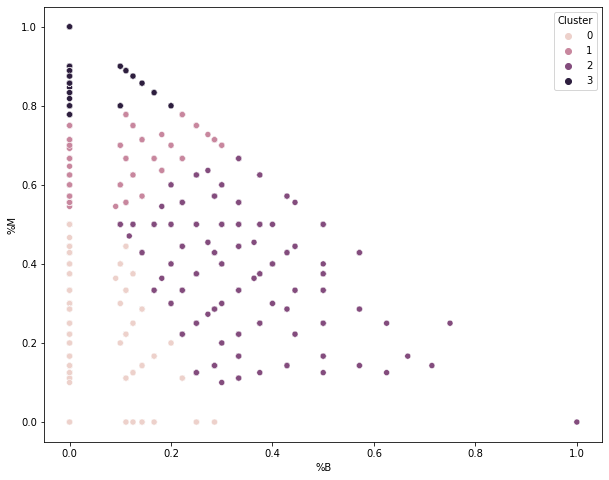

In [19]:
import seaborn as sns

plt.figure(figsize = (10,8))

sns.scatterplot(X['%B'],X['%M'], hue=melt_df['Cluster'])
plt.show()

In [20]:
from sklearn import metrics

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, melt_df['Cluster']))

Silhouette Coefficient: 0.434


In [21]:
output_df = melt_df['Cluster']

In [22]:
output_df.to_csv('assets/def_clust_output.csv')

In [23]:
melt_df.reset_index()[['gameId','playId','Cluster']]

value,gameId,playId,Cluster
0,2018090600,75,3
1,2018090600,146,1
2,2018090600,168,3
3,2018090600,190,2
4,2018090600,256,3
...,...,...,...
13959,2018121000,3747,3
13960,2018121000,3786,0
13961,2018121000,3817,1
13962,2018121000,3839,3


df[(df['playId']==4039) & (df['gameId']==2018110400)].melt(['gameId','playId']).dropna()

In [24]:
pos_df = pd.read_csv('assets/full_position.csv')

In [25]:
pos_df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,week
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN,1
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,1
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,1
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,1
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,1


In [26]:
pos_df = pos_df[['gameId','playId','nflId','x']]

In [27]:
pos_df = pos_df.groupby(by=['gameId','playId','nflId']).count()

In [28]:
pos_df = pos_df.reset_index().drop(columns=['x'])

In [29]:
pos_df.groupby(by=['gameId','playId']).count().sort_values(by='nflId')

,,nflId
gameId,playId,
2018092400,1867,6
2018110405,1062,6
2018112500,1824,6
2018120911,4000,6
2018092000,1539,6
...,...,...
2018093011,544,22
2018111106,554,22
2018091607,329,22
